[1.6659998800605534e-05, 8.51599994348362e-05, 0.00025511999992886556, 0.0005495099991094321, 0.0010168400011025369, 0.001722650000010617, 0.002658299999893643, 0.003883479999785777, 0.005510200001299381, 0.007463920000009239]


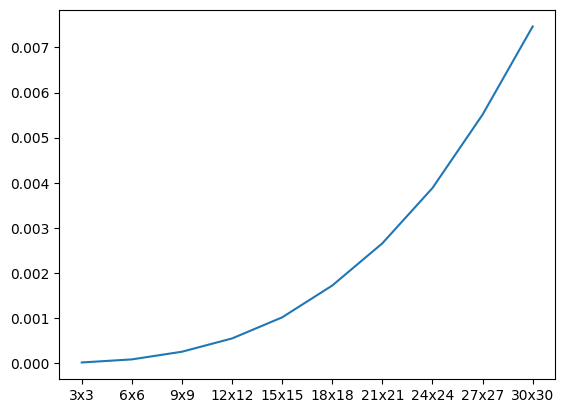

In [2]:

import numpy as np
import random 
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
def multiplicar(a:np.array,b:np.array):
    def multiplicar_listas(l1,l2):
        a_sumar=[]
        for i in range(len(l1)):
            a_sumar.append(l1[i]*l2[i])
        return sum(a_sumar)
    filas_a,columnas_a=np.shape(a)
    filas_b,columnas_b=np.shape(b)
   
    if columnas_a!=columnas_b:
        raise KeyError('las matrices no se pueden multiplicar')
    l=[]
    for x in range(filas_a):
        l.append([])
    for i in range(filas_a):  #por cada fila de a hay una columna de b SIEMPRE,sino no podríamos multiplicar las matrices
        for e in range(columnas_b):
            l[i].append(multiplicar_listas(a[i],b[:,e]))
    return np.array(l)
            

l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    l_timings.append(timings.best)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))





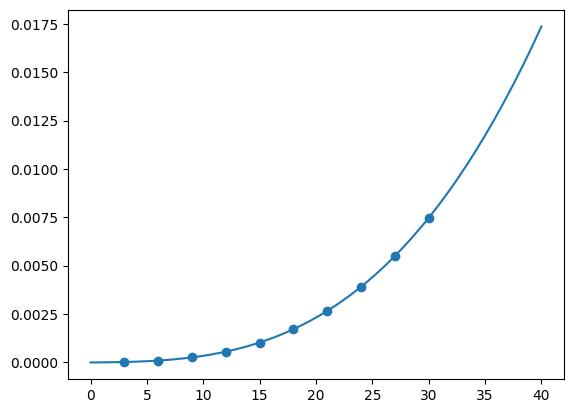

In [3]:
#para poder introducir enteros en la función polyfit, l_dims contendrá la dimensión de matrices m*n ( que siempre m=n)
l_dims=[3,6,9,12,15,18,21,24,27,30]

mymodel = np.poly1d(np.polyfit(l_dims,l_timings, 3))

myline = np.linspace(0, 40) 

#como vemos que la gráfica sigue después de los puntos definidos( el último en x=30),
#esto significa que hemos aplicado correctamente la regresión polinomial


plt.scatter(l_dims,l_timings)
plt.plot(myline, mymodel(myline))
plt.show()

1678047901.6867068
[0.0, 0.0, 0.0, 0.0009970664978027344, 0.000997781753540039, 0.0019943714141845703, 0.001994609832763672, 0.003989219665527344, 0.005983591079711914, 0.007979154586791992]


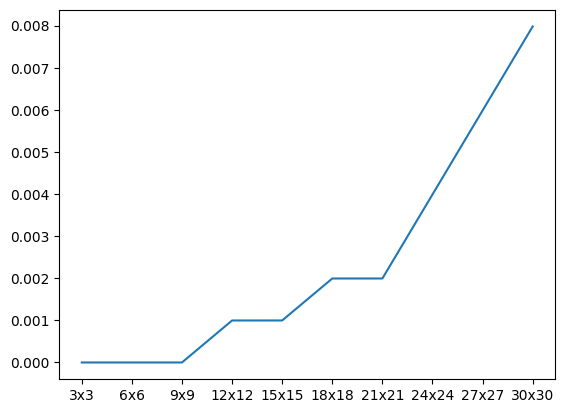

In [4]:
# midiendo tiempos tercer apartado

import time as tm
print(tm.time())
l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    #timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    
    inicio=tm.time()
    multiplicar(m, m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


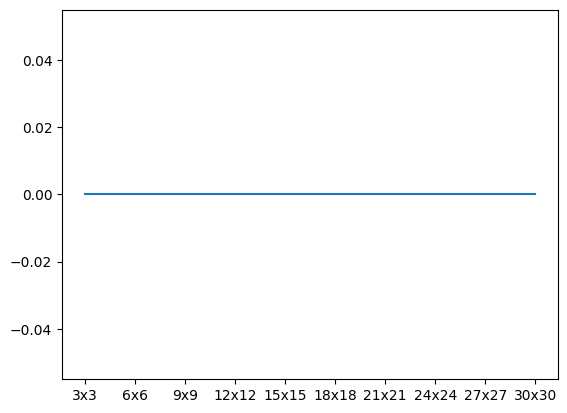

In [5]:
l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    l_dims.append(f'{3*i}x{3*i}')
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    timings = %timeit -o -n 10 -r 5 -q m.dot(m)
    l_timings.append(timings.best)

#print(plt.plot(l_dims,l_timings))

l_dims = []
l_timings = []
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}') 
    dim = 3*i
    m = np.random.uniform(0,1,(dim,dim))
    inicio=tm.time()
    m.dot(m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)
    
print(plt.plot(l_dims,l_timings))



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


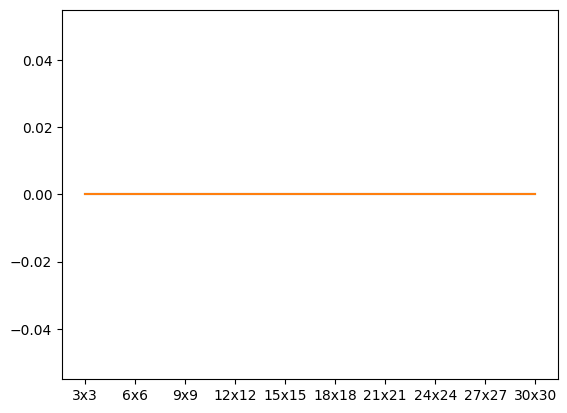

In [6]:
print(plt.plot(l_dims,l_timings))

l_dims = []
l_timings = []
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}') 
    dim = 3*i
    m = np.random.uniform(0,1,(dim,dim))
    inicio=tm.time()
    m.dot(m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)
    
print(plt.plot(l_dims,l_timings))

In [7]:
#3-A: Movimientos en Hanoi
movimientos = 0
def hanoi_moves(n, t1="t1", t2="t2", t3="t3"):

    global movimientos
    if n == 1:
        movimientos += 1
    else:
        hanoi_moves(n - 1, t1, t3, t2)
        movimientos +=1
        hanoi_moves(n - 1, t2, t1, t3)


hanoi_moves(4)
print (movimientos)


"""
Cuestiones: 
1)Funcion (n^2)-1

"""

15


'\nCuestiones: \n1)Funcion (n^2)-1\n\n'

[9.999930625781416e-08, 1.0999938240274787e-07, 2.899992978200316e-07, 5.699999746866524e-07, 9.499999578110874e-07, 1.5500001609325409e-06, 2.5200002710334957e-06, 4.1099992813542485e-06, 6.710000161547214e-06, 1.086999982362613e-05, 1.7600000137463213e-05, 2.862999972421676e-05, 4.652999923564494e-05, 7.515999895986169e-05, 0.00012254999892320485, 0.00019847999938065185, 0.00032436000037705526, 0.0005266499996650964, 0.0008546099998056889, 0.0013746099997661077, 0.002214570000069216, 0.003563919999578502, 0.005785860000469256, 0.009337829999276437, 0.015111419999448117]


'timings_iterativo=[]\nn_it = 0\nfor j in range(10):\n    n_it += 1\n    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)\n    timings_iterativo.append(timings.best)\n#print(timings_iterativo)'

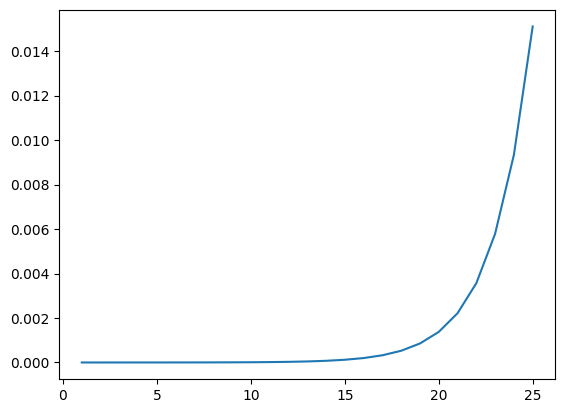

In [8]:
from matplotlib import pyplot as plt
import math
#3-B: fibonacci
def fibonacci_recursivo(n):
    if n == 0:
        return 0
    elif n == 1 or n == 2 :
        return 1
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)
    

def fibonacci_iterativo(n):
    if n == 0:
        return 0
    a = 0
    b = 1
    for h in range(n-1):
        c = a+b
        a = b
        b = c
    return c

timings_recursivo=[]
logaritmos =[]
eje_x=[]
n_rec=0
for i in range(25):
    n_rec += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_recursivo(n_rec)
    timings_recursivo.append(timings.best)
    logaritmos.append(math.log(timings.best))
    eje_x.append(n_rec)
print(timings_recursivo)
print(plt.plot(eje_x,timings_recursivo))
#print(plt.plot(eje_x,logaritmos))

"""timings_iterativo=[]
n_it = 0
for j in range(10):
    n_it += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)
    timings_iterativo.append(timings.best)
#print(timings_iterativo)"""


{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{56: 0.000498652458190918, 57: 0.00016621748606363931, 58: 0.0003325144449869792, 59: 0.00016609827677408853}
{56: 0.0003325541814168294, 57: 0.00016617774963378906, 58: 0.00033243497212727863, 59: 0.0003325541814168294}
{56: 0.00016621748606363931, 

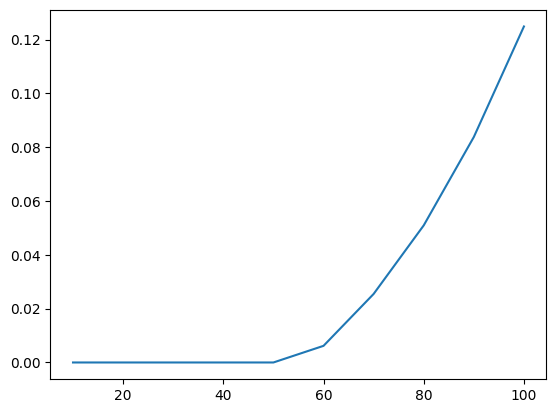

In [13]:
import numpy as np
import time

a=np.array([8,7,2,1,3,4,5,9,1,2])


def insert_sort(t: np.array):
    for i in range(1, len(t)):
        j = i
        a = t[i]
        while j > 0 and t[j-1] > a:
            t[j] = t[j-1]
            j -= 1
            t[j] = a
a=np.array([8,7,2,1,3,4,5,9,1,2])

def insert_sort1(t: np.array, ini: int, fin: int):
    if ini == fin:
        return t
    elif fin<0:
        fin=len(t)+fin #por si se nos introduce un índice final negativo, lo convertimos a positivo
    

    for i in range(ini,fin):
        j = i
        a = t[i]
        while ini < j  and t[j-1] > a:
            t[j] = t[j-1]
            j -= 1
            t[j] = a
    return t
#print(insert_sort1(a,0,-3))

def ave_time_insert_sort(n_permutations: int,size_ini:int,size_fin:int,step:int) -> np.array:
    
    list_tiempos_medias = []
    tamaño_array = []
    
    for e in range(size_ini,size_fin,step):
        
        tamaño_array.append(e)
        hacer_media_tiempos = []
        
        for i in range(n_permutations):
            
            creamos_permutación = np.random.permutation(e)  
            inicio=time.time()
            insert_sort(creamos_permutación)
            fin = time.time()
            tiempo_ejecucion = fin - inicio
            hacer_media_tiempos.append(tiempo_ejecucion)
        
        result = sum(hacer_media_tiempos)/n_permutations
        list_tiempos_medias.append(result)
        
    result = dict(zip(tamaño_array,list_tiempos_medias) )
       
    print(result)

    
l_i = []
l_timings = []
for i in range(1,11):
    l_i.append(i*10)
    timings = %timeit -o -n 10 -r 5 -q ave_time_insert_sort(6,56,10*i,1)
    l_timings.append(timings.best)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 

    
print(plt.plot(l_i,l_timings))
    




def worst_time_insert_sort(size_ini:int,size_fin:int,step:int) -> np.array:

    tamaño_array = []
    list_tiempos = []
    for e in range(size_ini,size_fin,step):
        
        tamaño_array.append(e)
        
        list_mayor_a_menor = []
        for i in reversed(range(1,e)):
            list_mayor_a_menor.append(i)  #de esta forma, el insertsort tendrá que hacer el mayor número de comparaciones posible.

        inicio=time.time()
        insert_sort(list_mayor_a_menor)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        list_tiempos.append(tiempo_ejecucion)
    print(list_tiempos)
    result = dict(zip(tamaño_array,list_tiempos) )
    print(result)
       
#worst_time_insert_sort(56,500,1)
    

    
            
        

[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de los arrays introducidos: 
{}
[]
los peores tiempos de ejecución de insertsort junto con los tamaños de

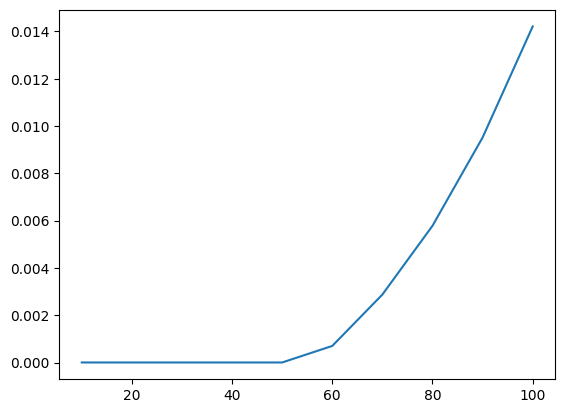

In [12]:
l_i = []
l_timings = []
for i in range(1,11):
    l_i.append(i*10)
    timings = %timeit -o -n 10 -r 5 -q worst_time_insert_sort(56,10*i,1)
    l_timings.append(timings.best)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 

    
print(plt.plot(l_i,l_timings))
